In [45]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [46]:
from google.colab import files
upload=files.upload()

Saving forestfires (1).csv to forestfires (1) (1).csv


In [47]:
df=pd.read_csv('forestfires (1).csv')

In [48]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [49]:
df.shape

(517, 31)

In [51]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [52]:
df1=df.drop(df.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1)

In [53]:
df1.shape

(517, 12)

In [54]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [55]:
df1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [56]:
df1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

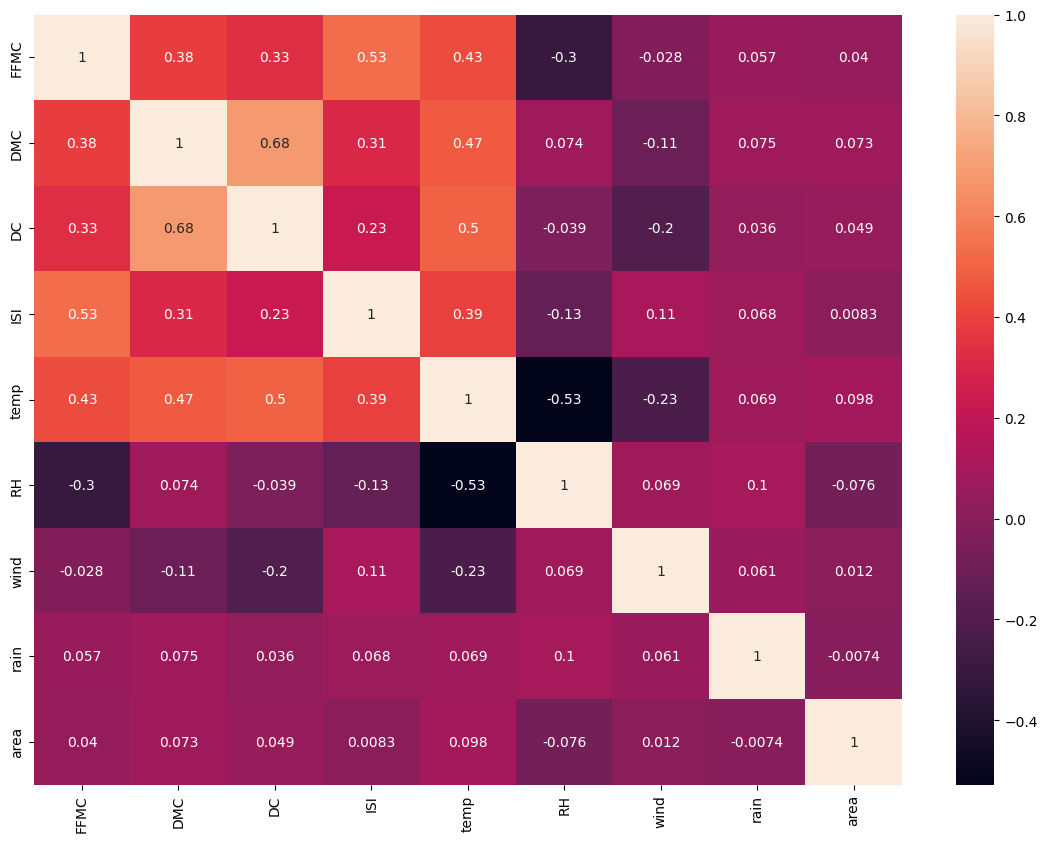

In [58]:
fig= plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=90);

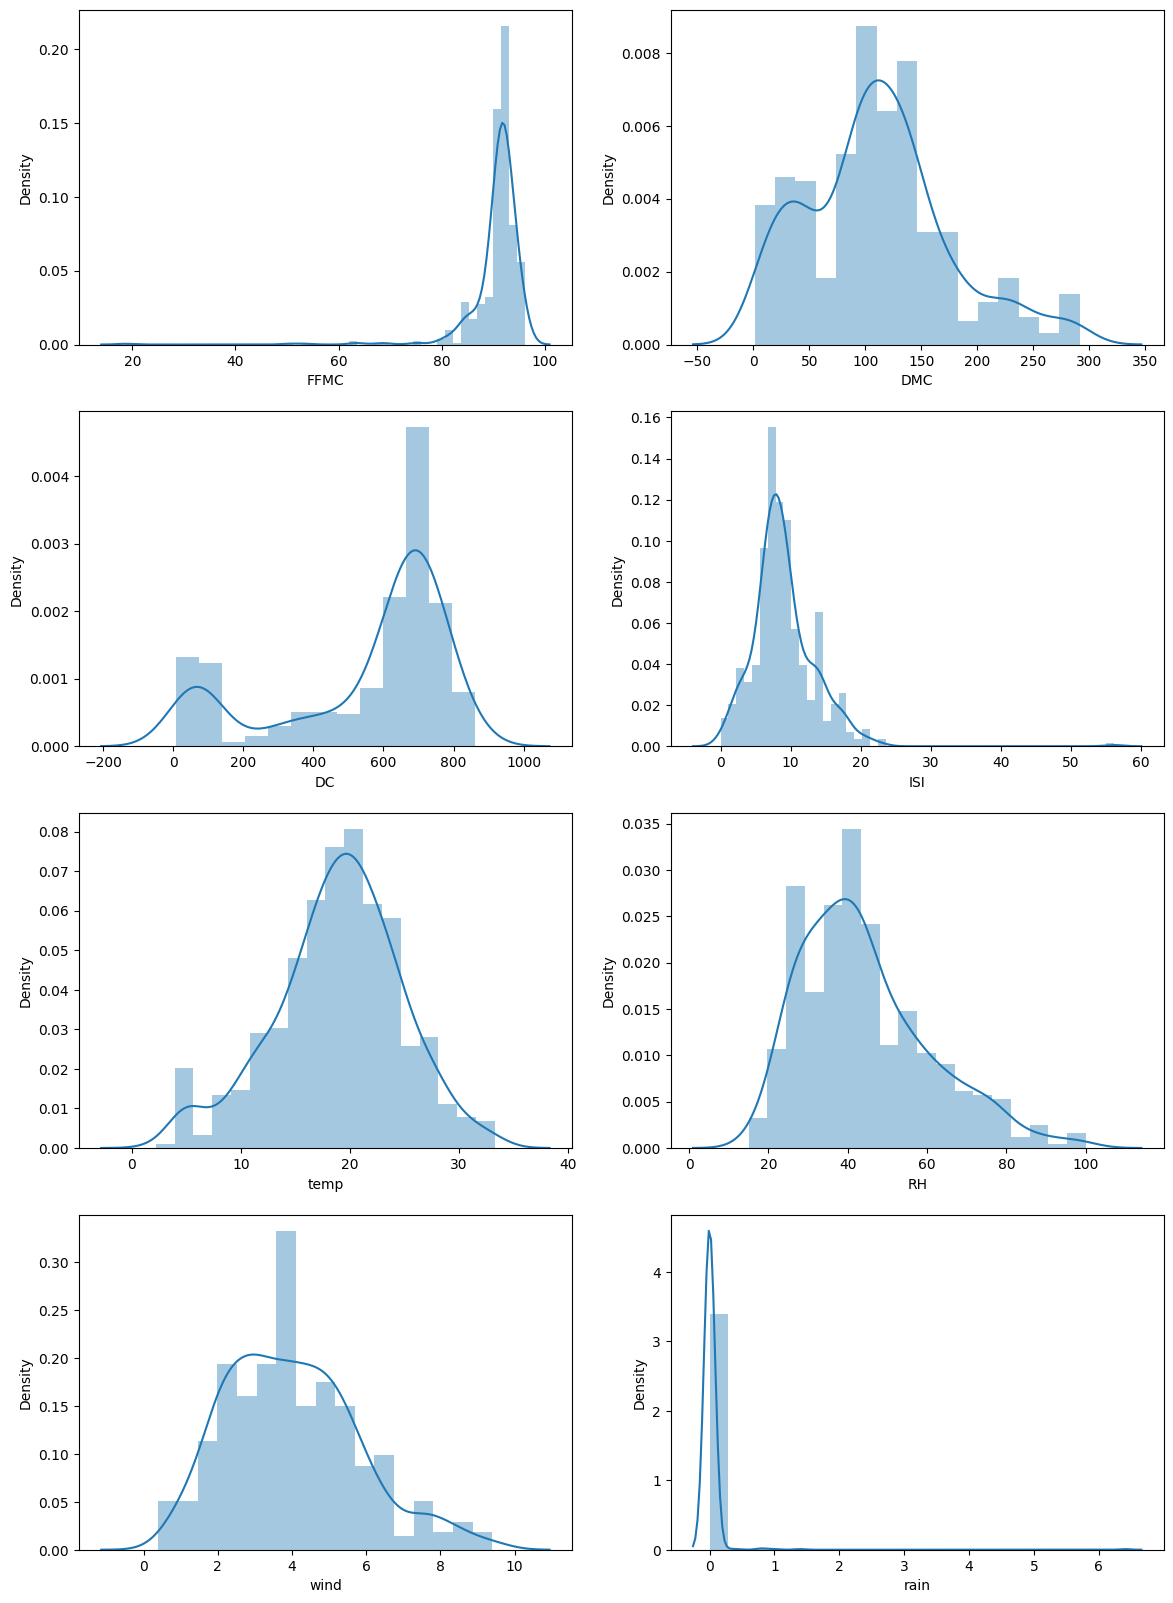

In [59]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.distplot(df1.FFMC, ax = ax[0,0])
sns.distplot(df1.DMC, ax = ax[0,1])
sns.distplot(df1.DC, ax = ax[1,0])
sns.distplot(df1.ISI, ax = ax[1,1])
sns.distplot(df1.temp, ax = ax[2,0])
sns.distplot(df1.RH, ax = ax[2,1])
sns.distplot(df1.wind, ax = ax[3,0])
sns.distplot(df1.rain, ax = ax[3,1])

plt.show()

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


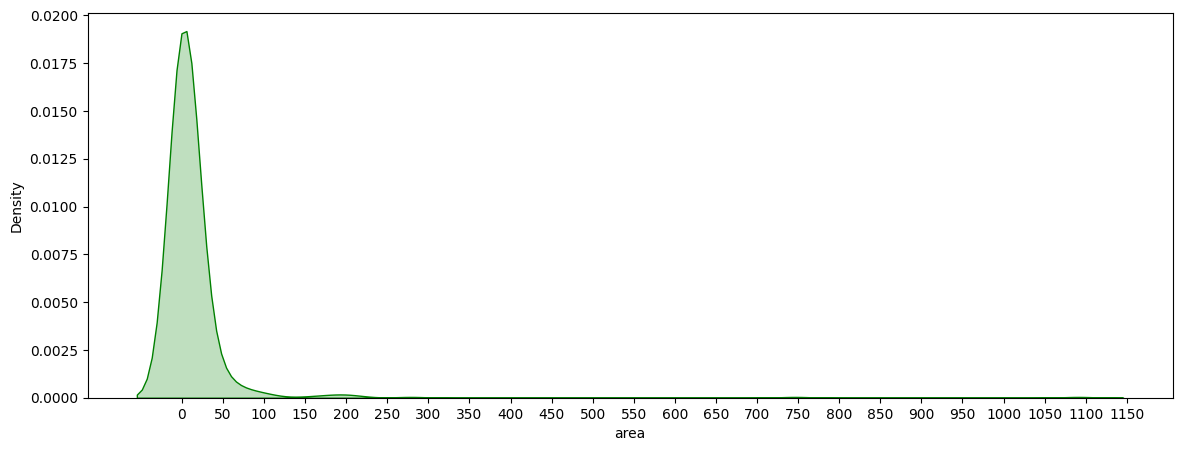

In [60]:
plt.figure(figsize=(14,5))
print("Skew: {}".format(df1['area'].skew()))
print("Kurtosis: {}".format(df1['area'].kurtosis()))
ax = sns.kdeplot(df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [61]:
df1.shape

(517, 12)

In [62]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [63]:
df2 = df1.copy()
order = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df2 = df2.replace(order)

In [64]:
df2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [65]:
df2.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [66]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [67]:
df2["size_category"]=label_encoder.fit_transform(df2["size_category"])

In [68]:
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [69]:
pip install scikeras

In [138]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam

In [108]:
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(32, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(11,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [93]:
df2.head(50)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small
5,aug,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,small
6,aug,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,small
7,aug,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,small
8,sep,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,small
9,sep,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,small


In [94]:
df2 = df1.copy()
order1 = {'day':{'sun':1,'mon':2,'tue':3,'wed':4,'thu':5,'fri':6,'sat':7}}
df2 = df2.replace(order1)

In [95]:
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [96]:
df3 = df2.copy()
order = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df3 = df3.replace(order)

In [97]:
df3

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [98]:
df3["size_category"]=label_encoder.fit_transform(df3["size_category"])

In [99]:
df3

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [100]:
x = df3.iloc[:,0:11]

y = df3.iloc[:,11]

In [101]:
x.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area'],
      dtype='object')

In [102]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [109]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [110]:
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   2.5s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.962 total time=   1.8s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.883 total time=   2.7s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.874 total time=   2.3s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.981 total time=   2.3s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 4/5; 9/16] END ....batch_size=40, epochs=10;, score=0.922 total time=   1.4s
[CV 5/5; 9/16] START batch_size=40, epochs=10...................................


[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=0.932 total time=   1.3s
[CV 1/5; 10/16] START batch_size=40, epochs=50..................................
[CV 1/5; 10/16] END ...batch_size=40, epochs=50;, score=1.000 total time=   2.6s
[CV 2/5; 10/16] START batch_size=40, epochs=50..................................
[CV 2/5; 10/16] END ...batch_size=40, epochs=50;, score=0.990 total time=   2.6s
[CV 3/5; 10/16] START batch_size=40, epochs=50..................................
[CV 3/5; 10/16] END ...batch_size=40, epochs=50;, score=0.981 total time=   2.3s
[CV 4/5; 10/16] START batch_size=40, epochs=50..................................
[CV 4/5; 10/16] END ...batch_size=40, epochs=50;, score=0.913 total time=   2.0s
[CV 5/5; 10/16] START batch_size=40, epochs=50..................................
[CV 5/5; 10/16] END ...batch_size=40, epochs=50;, score=0.951 total time=   2.0s
[CV 1/5; 11/16] START batch_size=40, epochs=100.................................
[CV 1/5; 11/16] END ..batch_

In [111]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9825242718446603, using {'batch_size': 20, 'epochs': 200}
0.9398805078416729,0.051551553950376014 with: {'batch_size': 10, 'epochs': 10}
0.9806758775205378,0.018273788148120598 with: {'batch_size': 10, 'epochs': 50}
0.9767176997759522,0.021807734504515553 with: {'batch_size': 10, 'epochs': 100}
0.976773711725168,0.017943106381569943 with: {'batch_size': 10, 'epochs': 200}
0.9670089619118745,0.04411790384136833 with: {'batch_size': 20, 'epochs': 10}
0.9767550410754294,0.013145251242779633 with: {'batch_size': 20, 'epochs': 50}
0.978696788648245,0.011284303454998996 with: {'batch_size': 20, 'epochs': 100}
0.9825242718446603,0.023300970873786398 with: {'batch_size': 20, 'epochs': 200}
0.924570575056012,0.04879466345414887 with: {'batch_size': 40, 'epochs': 10}
0.9670089619118745,0.0316827008037899 with: {'batch_size': 40, 'epochs': 50}
0.9728342046303211,0.022491895608573544 with: {'batch_size': 40, 'epochs': 100}
0.9709297983569829,0.019417798871327337 with: {'batch_size': 40, '

In [126]:
from keras.layers import Dropout



def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(20,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [127]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 200,dropout_rate =dropout_rate, learning_rate =learning_rate  )



learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]


param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)



grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=  11.5s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.981 total time=  11.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.981 total time=  11.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.942 total time=   9.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.961 total time=   9.8s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [128]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9902912621359224, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9728528752800598,0.01981679930541845 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9631628080657209,0.027061726910400978 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7325242718446603,0.15178269537446648 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9747946228528754,0.0209237932410546 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9709297983569829,0.019417798871327337 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7325242718446602,0.15400212878306063 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9902912621359224,0.012280689942401467 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9844660194174757,0.013169572782767505 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7344660194174758,0.1514034012637225 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [161]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(20,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(30,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [162]:

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10, activation_function= activation_function, init = init)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   1.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   1.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   1.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   1.8s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   3.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   1.9s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.750 total time=   1.8s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   1.7s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.680 total time=   1.8s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.699 total time=   1.8s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.7s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   1.7s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   1.7s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   1.8s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.699 total time=   1.6s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   1.8s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.808 total time=   1.8s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.874 total time=   2.3s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.806 total time=   1.6s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.883 total time=   1.5s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   1.6s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.750 total time=   1.7s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.796 total time=   1.5s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.796 total time=   1.9s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.825 total time=   2.8s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   1.5s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   1.5s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   1.7s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   1.7s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   1.8s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   2.5s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.923 total time=   2.0s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.971 total time=   1.7s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.961 total time=   1.6s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.922 total time=   1.8s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=0.990 total time=   1.7s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.990 total time=   1.5s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.786 total time=   2.2s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.961 total time=   1.9s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.903 total time=   3.6s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   1.9s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   1.8s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   1.9s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   2.9s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   1.9s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   1.8s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.865 total time=   1.8s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.883 total time=   1.7s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.913 total time=   1.6s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.893 total time=   3.2s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.7s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.808 total time=   1.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.874 total time=   1.5s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.942 total time=   1.7s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.854 total time=   1.8s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   1.6s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   2.2s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   1.7s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   1.5s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   1.5s


In [163]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9554891710231516, using {'activation_function': 'tanh', 'init': 'uniform'}
0.7305825242718447,0.15435061257849172 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825242718447,0.15435061257849172 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825242718447,0.15435061257849172 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8741598207617625,0.07072564356495889 with: {'activation_function': 'relu', 'init': 'uniform'}
0.833495145631068,0.086669180219308 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825242718447,0.15435061257849172 with: {'activation_function': 'relu', 'init': 'zero'}
0.9554891710231516,0.029665447488864165 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.926250933532487,0.07687137538314313 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825242718447,0.15435061257849172 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9109410007468259,0.04706929676825771 with: {'activation_

In [173]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [179]:
neuron1 = [4,8,16]
neuron2 = [2,4,8]

In [180]:
model= KerasClassifier(build_fn=create_model,verbose=0,batch_size=20,epochs=200,neuron1= neuron1, neuron2=neuron2)

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)


In [181]:
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=  12.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.971 total time=  11.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.990 total time=  10.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.951 total time=  10.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.951 total time=  12.1s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=  11.9s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   9.9s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.990 total time=  10.2s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.961 total time=   9.7s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.971 total time=  11.3s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=  11.3s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   9.2s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   9.9s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.961 total time=  11.4s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.971 total time=   9.9s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=1.000 total time=  10.2s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.971 total time=  13.5s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.981 total time=  10.7s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.942 total time=  11.5s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.951 total time=  10.5s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=  12.0s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.952 total time=  10.3s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=  10.4s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.971 total time=  10.3s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.971 total time=  11.4s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=  10.6s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=  11.4s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.981 total time=  11.4s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.961 total time=   9.5s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.942 total time=  11.9s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=1.000 total time=  10.3s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.962 total time=  11.4s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.981 total time=  10.2s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.971 total time=  11.4s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.942 total time=  11.3s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=1.000 total time=   9.8s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.971 total time=  11.8s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.990 total time=  12.1s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.951 total time=  11.8s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.971 total time=  11.6s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=  11.3s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=  10.7s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=  11.4s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.971 total time=  11.4s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.932 total time=  11.4s


In [182]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864077669902912, using {'neuron1': 4, 'neuron2': 8}
0.9728715459297984,0.019796841299070524 with: {'neuron1': 4, 'neuron2': 2}
0.9844660194174757,0.015774831853662054 with: {'neuron1': 4, 'neuron2': 4}
0.9864077669902912,0.01692776288753659 with: {'neuron1': 4, 'neuron2': 8}
0.9689880507841673,0.02073773869185569 with: {'neuron1': 8, 'neuron2': 2}
0.9787341299477221,0.018691586468693906 with: {'neuron1': 8, 'neuron2': 4}
0.9766990291262136,0.02264447337803999 with: {'neuron1': 8, 'neuron2': 8}
0.9709484690067214,0.01938067403532019 with: {'neuron1': 16, 'neuron2': 2}
0.9767550410754294,0.016908847959924707 with: {'neuron1': 16, 'neuron2': 4}
0.9805825242718447,0.026765143207942165 with: {'neuron1': 16, 'neuron2': 8}


In [183]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(30,input_dim = 11,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(20,input_dim = 11,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


In [184]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 200)

# Fitting the model

model.fit(x,y)

# Predicting using trained model

y_predict = model.predict(x)

# Printing the metrics
print(accuracy_score(y,y_predict))

0.9903288201160542


In [198]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation_function = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = 11,kernel_initializer = init,activation_function = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [204]:
def toFindBestParams(x,y):
    batch_size_list = [10,15,20]
    epoch_list      = [10,100,200]


    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:


            model = Sequential()
            model.add(Dense(units=50, input_dim=11, kernel_initializer='normal', activation='tanh'))


            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))


            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

            model_trained = model.fit(x,y ,batch_size = 20, epochs = 200, verbose=0)


            Accuracy_train = model_trained.history['accuracy'][-1]


            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)


toFindBestParams(x,y)

batch_size: 10 - epochs: 10 Accuracy: 0.988394558429718
batch_size: 10 - epochs: 100 Accuracy: 0.990328848361969
batch_size: 10 - epochs: 200 Accuracy: 0.9864603281021118
batch_size: 15 - epochs: 10 Accuracy: 0.9845260977745056
batch_size: 15 - epochs: 100 Accuracy: 0.9690521955490112
batch_size: 15 - epochs: 200 Accuracy: 0.9922630786895752
batch_size: 20 - epochs: 10 Accuracy: 0.978723406791687
batch_size: 20 - epochs: 100 Accuracy: 0.988394558429718
batch_size: 20 - epochs: 200 Accuracy: 0.988394558429718
